In [85]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import cv2

In [86]:
plt.rcParams["figure.figsize"] = (16*1.5, 9*1.5)

In [87]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

In [88]:
def contrast_stretching(X):
    return ((X - X.min()) / (X.max() - X.min())) * 255

In [89]:
RGB_image = mpimg.imread('DSCN5151.JPG')
Gray_image = rgb2gray(RGB_image)
Gray_image_stretched = contrast_stretching(Gray_image)

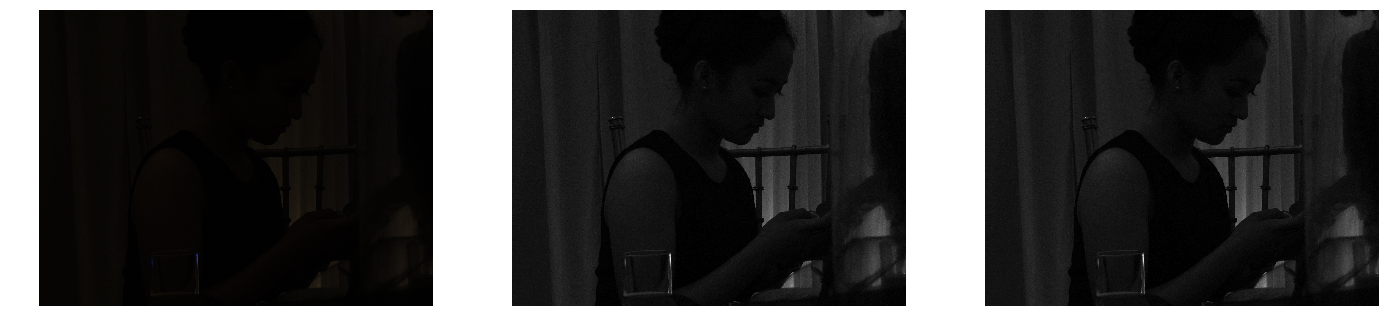

In [90]:
plt.subplot(131)
plt.imshow(RGB_image)
plt.axis('off')
plt.subplot(132)
plt.imshow(Gray_image, cmap = 'gray')
plt.axis('off')
plt.subplot(133)
plt.imshow(Gray_image_stretched, cmap = 'gray')
plt.axis('off')

plt.savefig('rgb_gray_stretch.png', dpi = 300, bbox_inches='tight')
plt.show()

In [92]:
Gray_image.min(), Gray_image.max()

(0.0, 68.9188)

In [91]:
Gray_image_stretched.min(), Gray_image_stretched.max()

(0.0, 255.0)

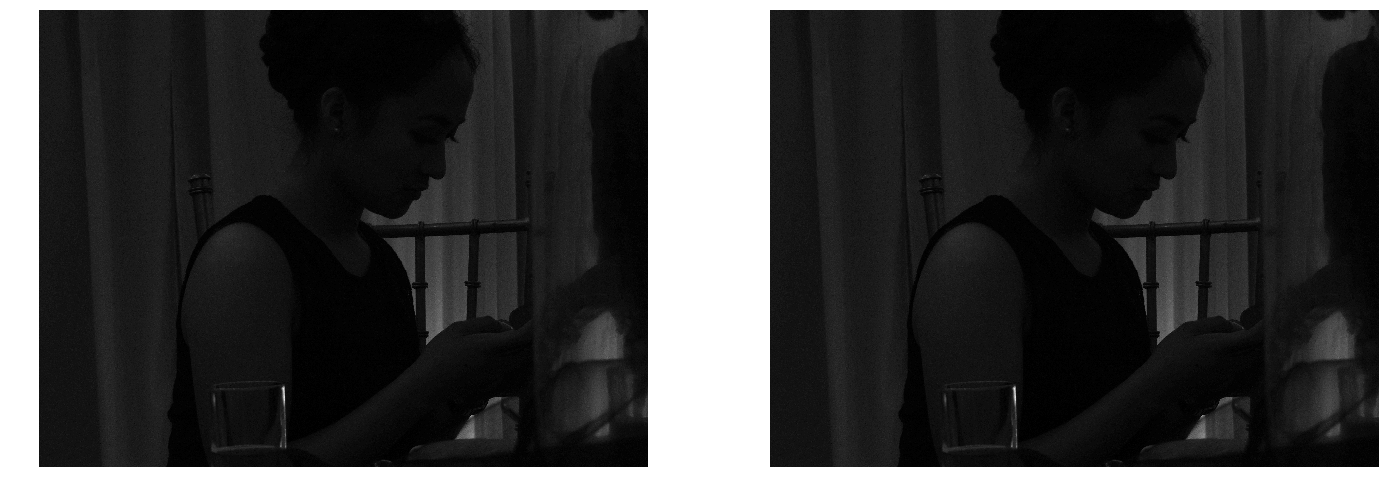

In [75]:
plt.subplot(121)
plt.imshow(Gray_image, cmap = 'gray')
plt.axis('off')
plt.subplot(122)
plt.imshow(Gray_image_stretched, cmap = 'gray')
plt.axis('off')
plt.show()

In [104]:
Gray_image = 255*Gray_image/Gray_image.max()

In [105]:
a, binning= np.histogram(Gray_image, bins = 255, density=True)

In [106]:
Values = np.arange(0,255)
CDF = np.cumsum(a)

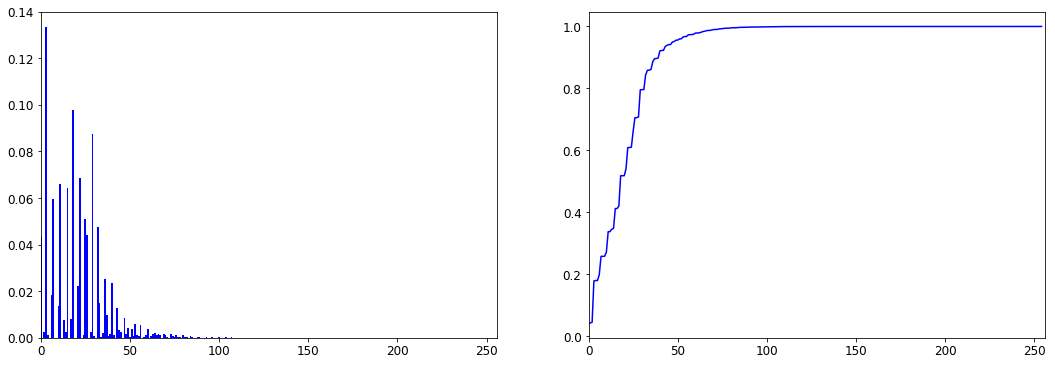

In [107]:
plt.figure(figsize = [18,6])
plt.subplot(121)
plt.bar(binning[:-1],a,width=1, color='blue')
plt.xlim(0,256)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.subplot(122)
plt.plot(Values, CDF, color='blue')
plt.xlim(0,256)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.savefig('pdf_cdf_original_image.png', dpi = 300, bbox_inches='tight')
plt.show()

In [48]:
CDF_uniform_y = np.linspace(0,1,255)
CDF_uniform_x = np.arange(0,255)

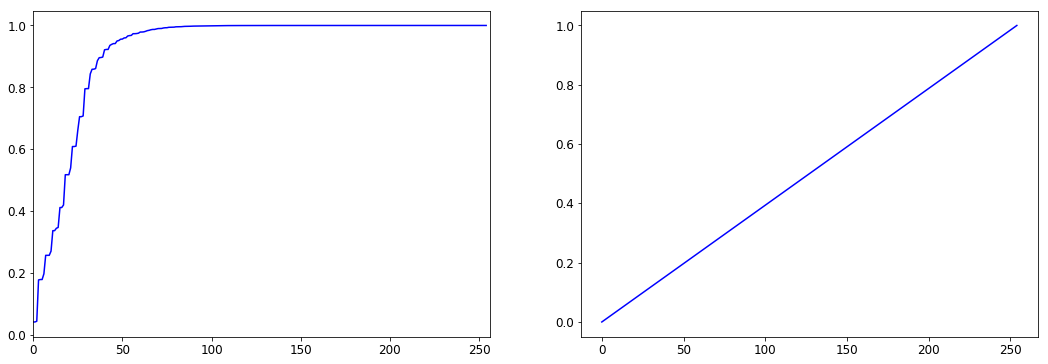

In [97]:
plt.figure(figsize = [9*2,6])
plt.subplot(121)
plt.plot(Values, CDF, color='blue')
plt.xlim(0,256)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.subplot(122)
plt.plot(CDF_uniform_x, CDF_uniform_y, color='blue')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.savefig('desired_linear.png', dpi = 300, bbox_inches='tight')
plt.show()

In [112]:
Gray_image_linear = Gray_image.astype(int)

linear_dataframe = pd.DataFrame()
linear_dataframe['Original Grayscale Values'] = Values
linear_dataframe['CDF Values'] = CDF
linear_dataframe['New Grayscale Values'] = CDF * 256

In [113]:
linear_dataframe.head(10)

,Original Grayscale Values,CDF Values,New Grayscale Values
0,0,0.043216,11.063175
1,1,0.043280,11.079765
2,2,0.045563,11.664175
3,3,0.178887,45.795042
4,4,0.180193,46.129356
5,5,0.180195,46.130015
6,6,0.198664,50.858057
7,7,0.258241,66.109648
8,8,0.258332,66.133038
9,9,0.258332,66.133054


In [114]:
# Store country_codes and continent_codes column data for further usage
oldval = np.array(linear_dataframe['Original Grayscale Values'])
newval = np.array(linear_dataframe['New Grayscale Values'])

# Mask of elements to be changed
mask = np.in1d(Gray_image_linear,oldval)

# Indices for each match from oldval in arr
idx = np.searchsorted(oldval,Gray_image_linear.ravel()[mask])

# Using the mask put selective elements from continent_codes column into arr
Gray_image_linear.ravel()[mask] = newval[idx]

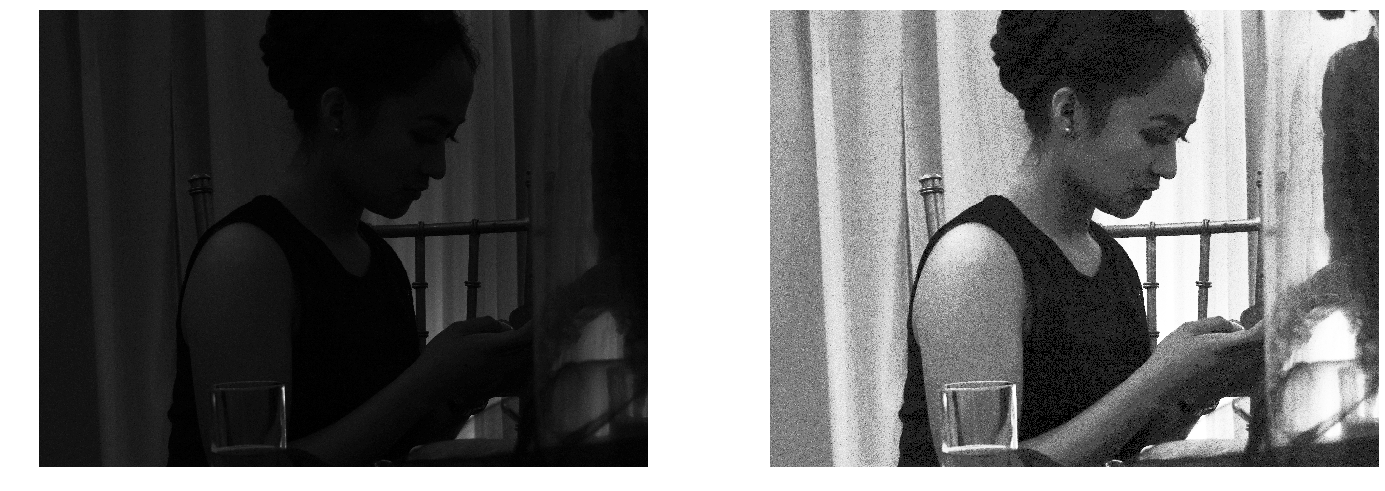

In [115]:
plt.subplot(121)
plt.imshow(Gray_image, cmap = 'gray')
plt.axis('off')
plt.subplot(122)
plt.imshow(Gray_image_linear, cmap = 'gray')
plt.axis('off')
plt.savefig('desired_image_linear.png', dpi = 300, bbox_inches='tight')
plt.show()

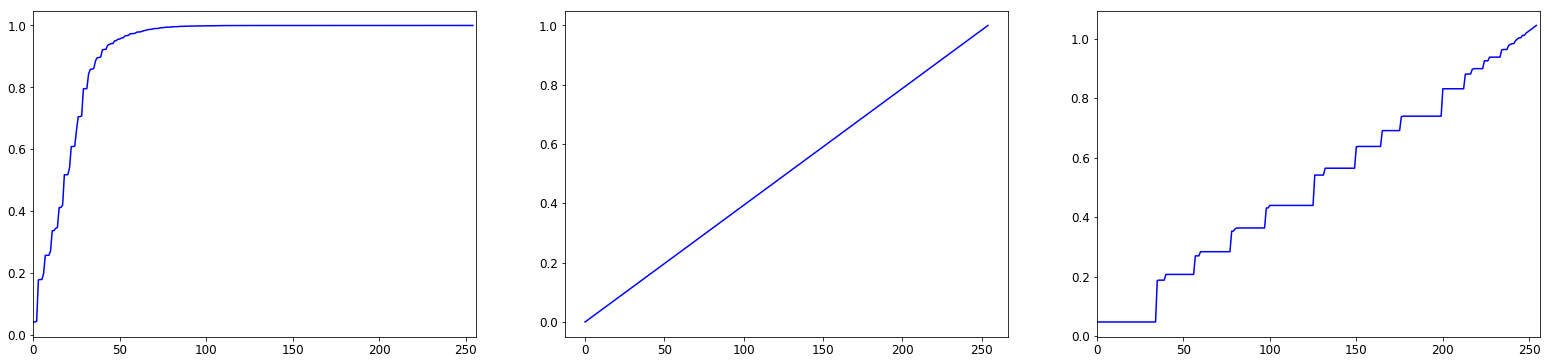

In [118]:
a, binning= np.histogram(Gray_image_linear, bins = 255, density=True)
Values_a = np.arange(0,255)
CDF_a = np.cumsum(a)

plt.figure(figsize = [27,6])
plt.subplot(131)
plt.plot(Values, CDF, color='blue')
plt.xlim(0,256)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.subplot(132)
plt.plot(CDF_uniform_x, CDF_uniform_y, color='blue')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.subplot(133)
plt.plot(Values_a, CDF_a, color='blue')
plt.xlim(0,256)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.savefig('pdf_cdf_linear_image.png', dpi = 300, bbox_inches='tight')
plt.show()

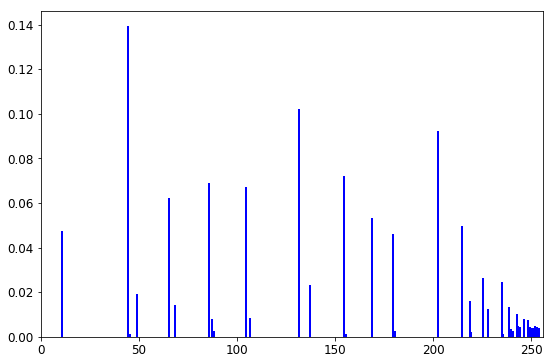

In [120]:
plt.figure(figsize=[9,6])
plt.bar(binning[:-1],a,width=1, color='blue')
plt.xlim(0,256)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.savefig('histogram_linear', dpi=300, bbox_inches='tight')

In [54]:
def sigmoid_function(X):
    return 1 / (1 + np.exp((a-X)/m))

def inverse_sigmoid(Y):
    return a - m*np.log((1/Y)-1)

In [141]:
CDF_sigmoid_x = np.arange(0,256)

a = np.median(CDF_sigmoid_x)
m = 15
CDF_sigmoid_y = sigmoid_function(CDF_sigmoid_x)

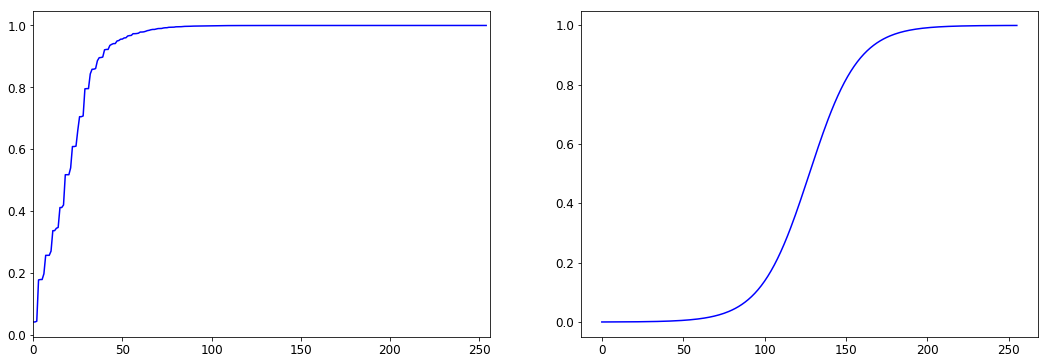

In [142]:
plt.figure(figsize = [9*2,6])
plt.subplot(121)
plt.plot(Values, CDF, color='blue')
plt.xlim(0,256)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.subplot(122)
plt.plot(CDF_sigmoid_x, CDF_sigmoid_y, color='blue')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.savefig('desired_sigmoid.png', dpi = 300, bbox_inches='tight')
plt.show()

In [143]:
Gray_image_sigmoid = Gray_image.astype(int)

sigmoid_dataframe = pd.DataFrame()

sigmoid_dataframe['Original Grayscale Values'] = Values
sigmoid_dataframe['CDF Values'] = CDF
sigmoid_dataframe['Sigmoid Grayscale Values'] = inverse_sigmoid(CDF)

In [144]:
# Store country_codes and continent_codes column data for further usage
oldval1 = np.array(sigmoid_dataframe['Original Grayscale Values'])
newval1 = np.array(sigmoid_dataframe['Sigmoid Grayscale Values'])

# Mask of elements to be changed
mask1 = np.in1d(Gray_image_sigmoid,oldval1)

# Indices for each match from oldval in arr
idx1 = np.searchsorted(oldval1,Gray_image_sigmoid.ravel()[mask1])

# Using the mask put selective elements from continent_codes column into arr
Gray_image_sigmoid.ravel()[mask1] = newval1[idx1]

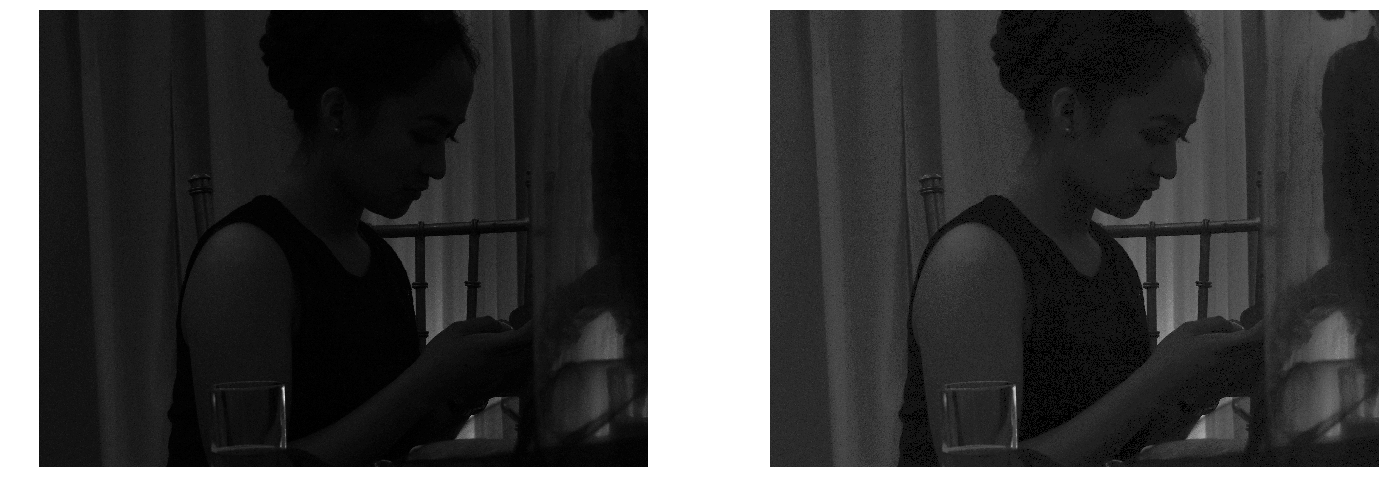

In [145]:
plt.subplot(121)
plt.imshow(Gray_image, cmap = 'gray')
plt.axis('off')
plt.subplot(122)
plt.imshow(Gray_image_sigmoid, cmap = 'gray')
plt.axis('off')
plt.savefig('desired_image_sigmoid.png', dpi = 300, bbox_inches='tight')
plt.show()

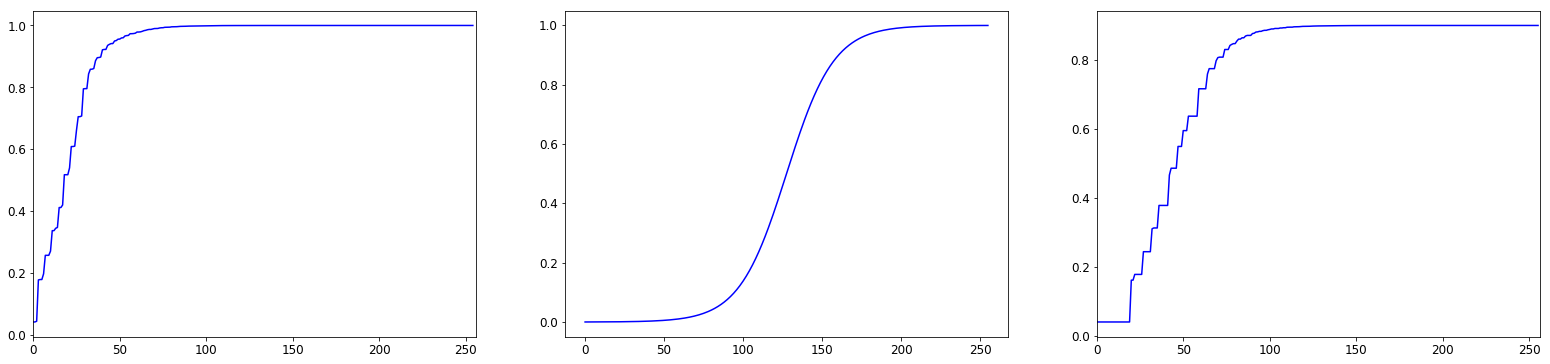

In [151]:
aa, binninga = np.histogram(Gray_image_sigmoid, bins = 256, density=True)
Values_b = np.arange(0,256)
CDF_b = np.cumsum(aa)

plt.figure(figsize = [27,6])
plt.subplot(131)
plt.plot(Values, CDF, color='blue')
plt.xlim(0,256)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.subplot(132)
plt.plot(CDF_sigmoid_x, CDF_sigmoid_y, color='blue')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.subplot(133)
plt.plot(Values_b, CDF_b, color='blue')
plt.xlim(0,256)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.savefig('pdf_cdf_sigmoid_image.png', dpi = 300, bbox_inches='tight')
plt.show()

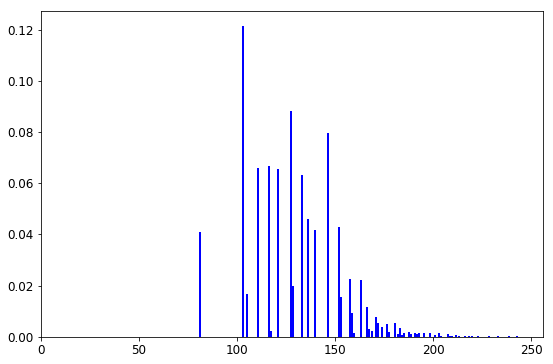

In [153]:
plt.figure(figsize=[9,6])
plt.bar(binninga[:-1],aa,width=1, color='blue')
plt.xlim(0,256)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.savefig('histogram_sigmoid', dpi=300, bbox_inches='tight')

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 7 Text yticklabel objects>)

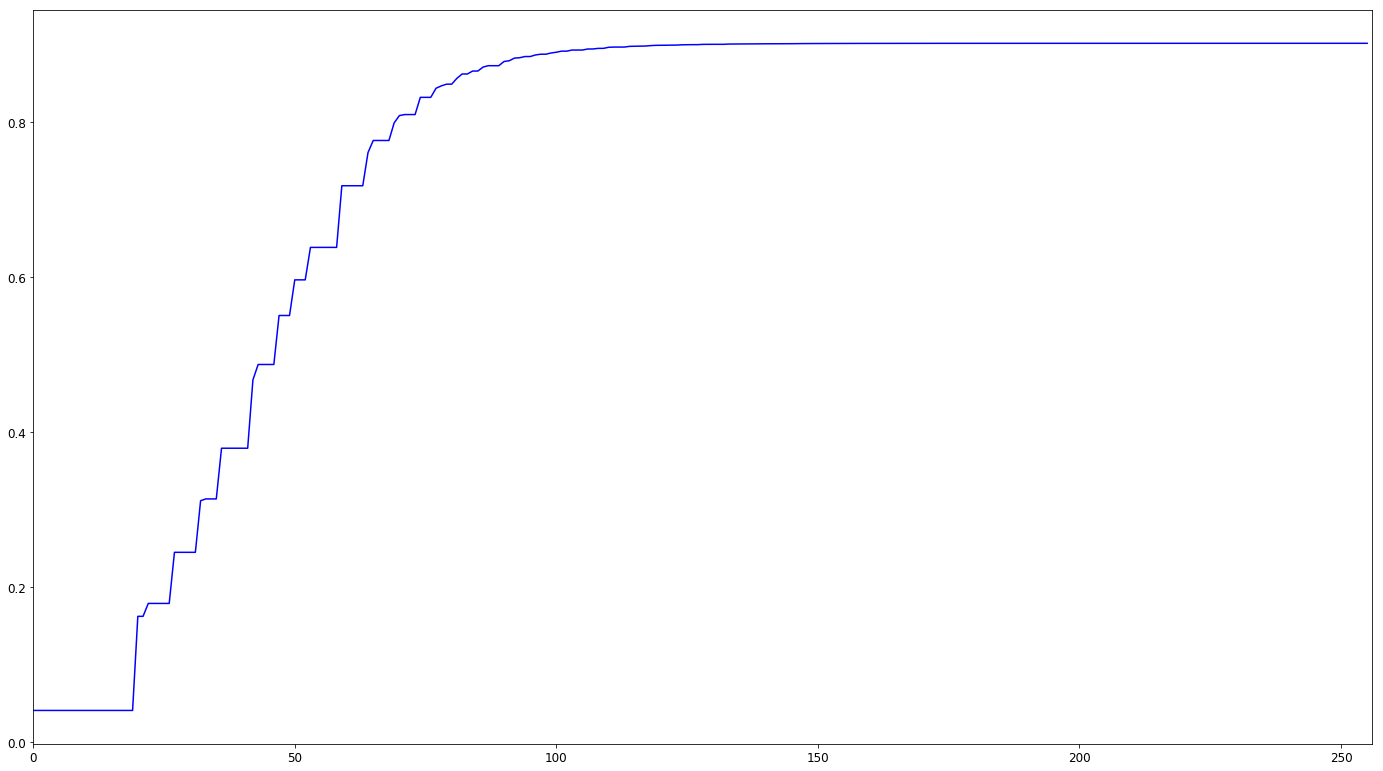

In [157]:
plt.plot(Values_b, CDF_b, color='blue')
plt.xlim(0,256)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
